In [1]:
import sys, os
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
sys.path.append(project_root)

from functions import *

%load_ext autoreload
%autoreload 2

In [2]:
x = np.linspace(-1, 1, 100).reshape(-1, 1)
y = 1/(1 + 25 * x**2) + 0.1 * np.random.normal(0, 1, x.shape)

In [54]:
reg_nn_adam = NeuralNetwork(1, [8, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
reg_nn_RMSProp = NeuralNetwork(1, [8, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)
reg_nn_gd = NeuralNetwork(1, [8, 1], [sigmoid, identity], [derivate(sigmoid), derivate(identity)], mse, mse_der)

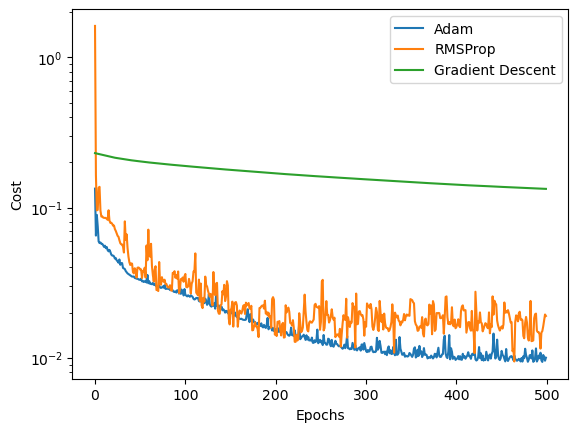

In [55]:
reg_nn_adam.train_SGD(x, y, epochs=500, learning_rate=0.01, batch_size=16, optimizer="Adam")
reg_nn_RMSProp.train_SGD(x, y, epochs=500, learning_rate=0.01, batch_size=16, optimizer="RMSProp")
reg_nn_gd.train_SGD(x, y, epochs=500, learning_rate=0.01, batch_size=16)

plt.plot(reg_nn_adam.training_info["Cost_history"], label="Adam")
plt.plot(reg_nn_RMSProp.training_info["Cost_history"], label="RMSProp")
plt.plot(reg_nn_gd.training_info["Cost_history"], label="Gradient Descent")
plt.xlabel("Epochs")
plt.ylabel("Cost")
plt.yscale("log")
plt.legend()

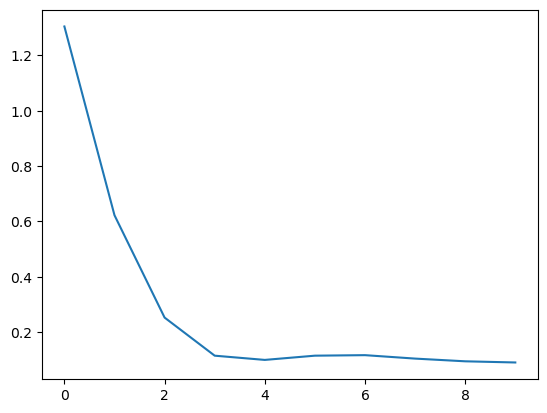